In [7]:
from python_path import PythonPath

import dicto as do
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

with PythonPath(".."):
    from pilotnet import estimator as est
    
    
DATA_DIR = "../data/augmented"
NORMALIZE = DATA_DIR.endswith("raw")
PARAMS_PATH = "../pilotnet/config/params.yml"

In [2]:
tf.enable_eager_execution()

In [12]:
params = do.load(PARAMS_PATH)
ds = est.input_fn(DATA_DIR, NORMALIZE, params)

In [13]:
it = iter(ds)
batch = it.next()

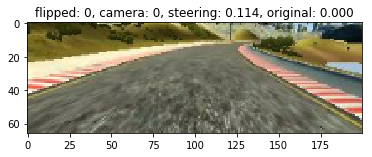

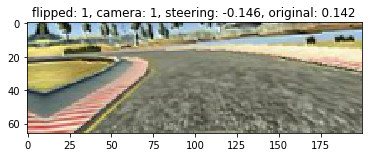

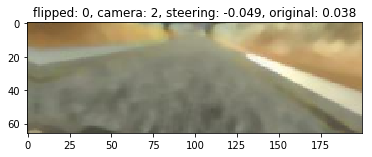

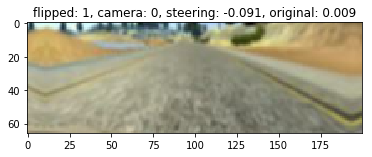

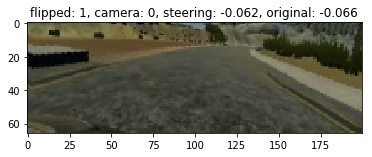

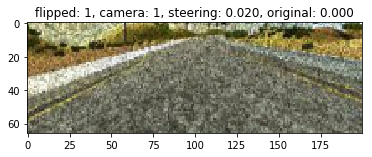

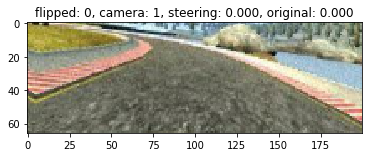

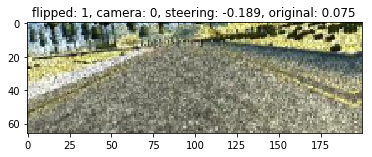

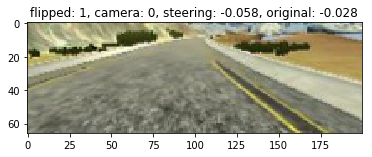

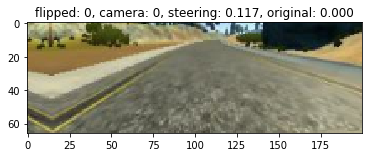

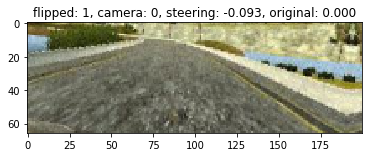

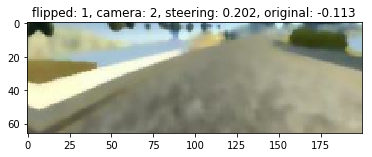

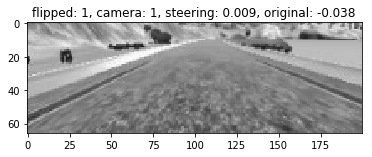

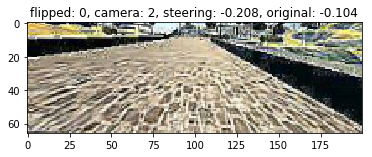

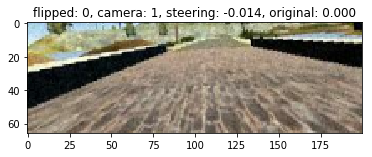

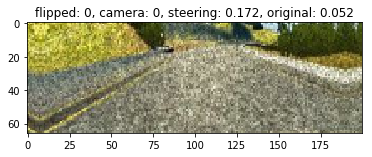

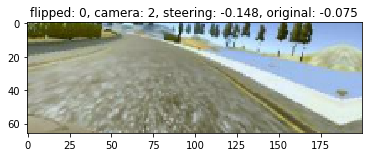

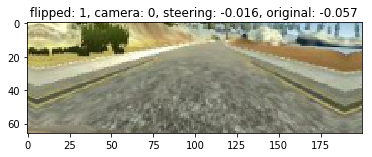

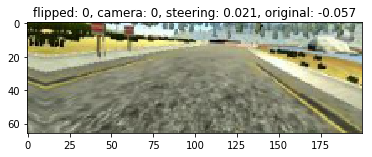

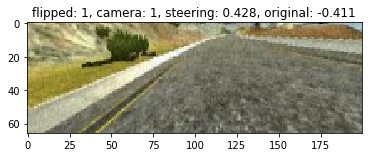

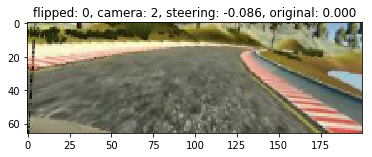

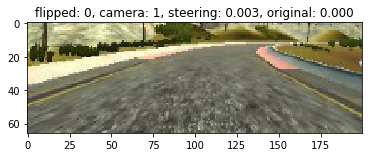

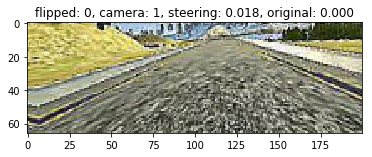

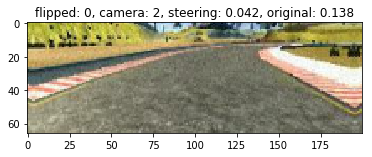

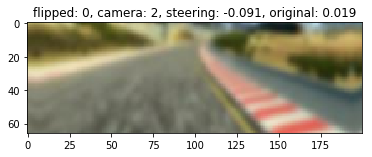

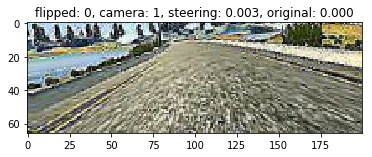

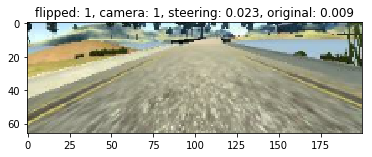

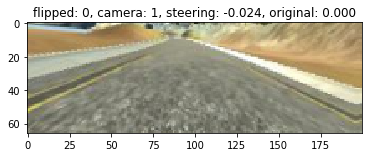

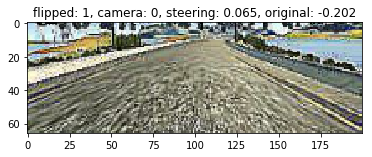

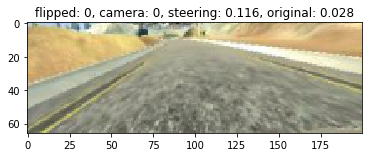

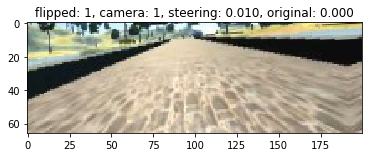

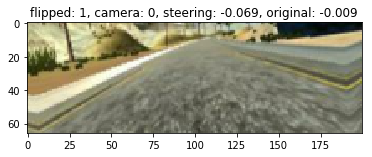

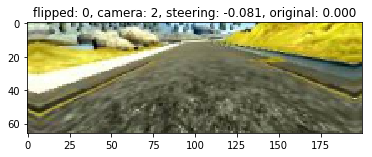

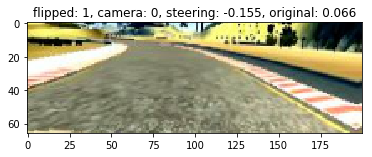

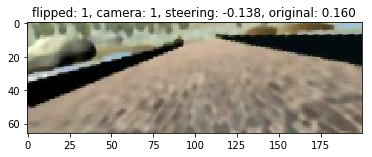

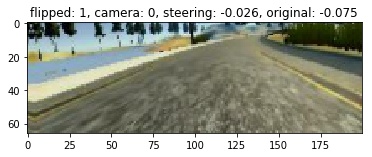

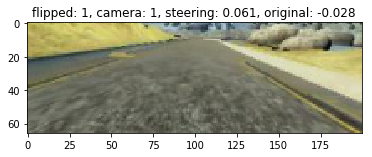

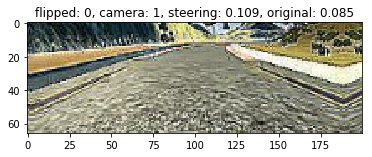

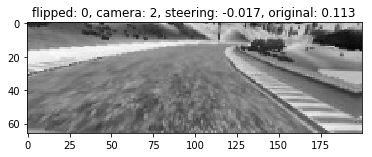

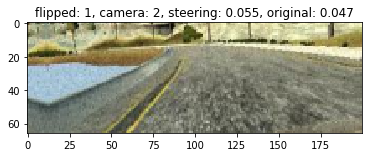

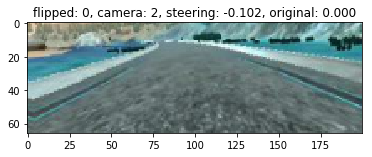

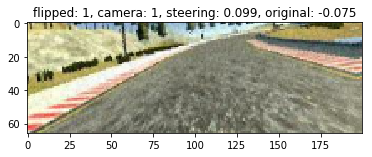

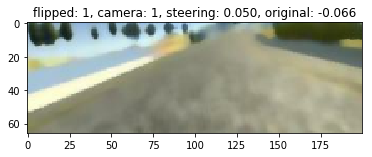

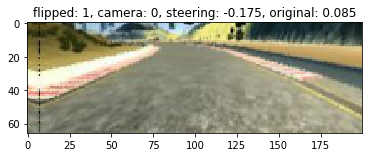

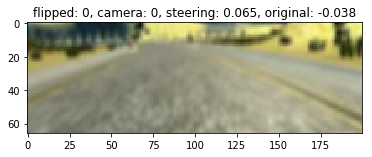

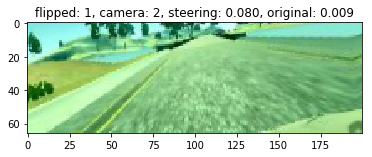

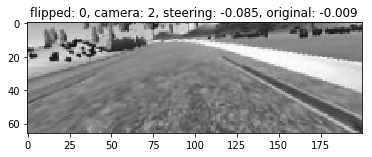

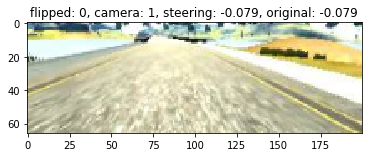

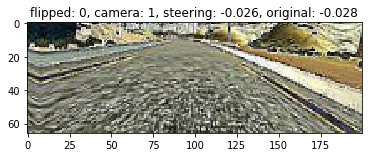

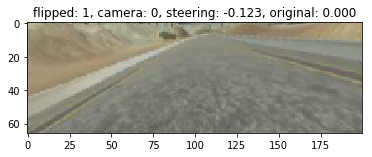

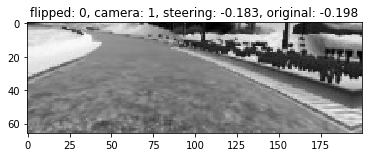

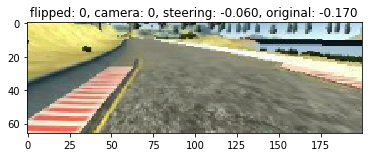

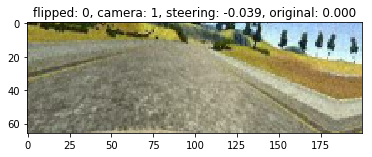

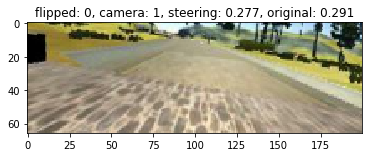

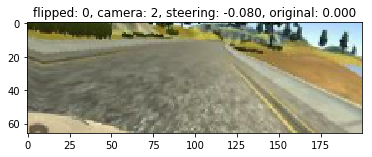

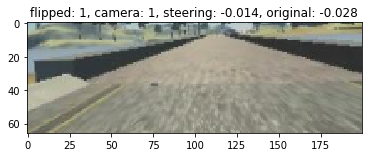

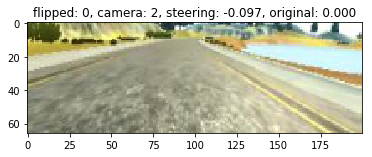

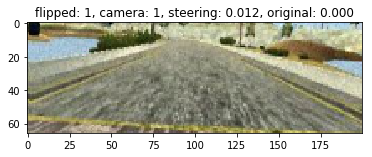

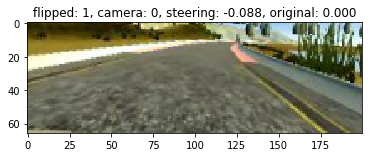

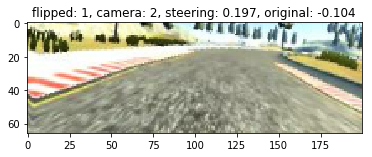

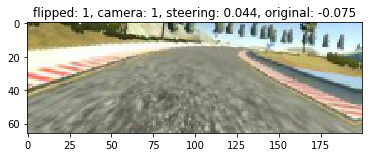

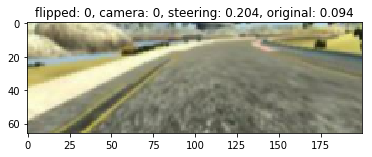

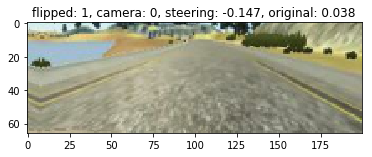

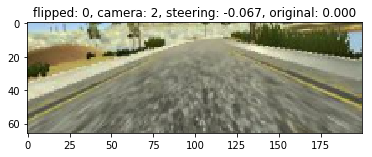

In [14]:
for camera, filepath, image, steering, original_steering, flipped in zip(
    batch["camera"], batch["filepath"], batch["image"], batch["steering"], 
    batch["original_steering"], batch["flipped"]):
    
    image = 255 * (image + 1.0) / 2.0
    image = tf.cast(image, tf.uint8)
#     image = image.numpy().astype(np.uint8)
    
    plt.imshow(image)
    plt.title("flipped: {flipped}, camera: {camera}, steering: {steering:.3f}, original: {original_steering:.3f}".format(
        camera = camera,
        steering = steering,
        original_steering = original_steering,
        flipped = flipped,
    ))
    plt.show()
    